## Ejercicio 1: Preprocesamiento

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10,6)
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('churn_train.csv').drop(columns='Unnamed: 0')
df_test = pd.read_csv('churn_test.csv').drop(columns='Unnamed: 0')

In [3]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
state                            3333 non-null object
account_length                   3333 non-null int64
area_code                        3333 non-null object
international_plan               3333 non-null object
voice_mail_plan                  3333 non-null object
number_vmail_messages            3333 non-null int64
total_day_minutes                3333 non-null float64
total_day_calls                  3333 non-null int64
total_day_charge                 3333 non-null float64
total_eve_minutes                3333 non-null float64
total_eve_calls                  3333 non-null int64
total_eve_charge                 3333 non-null float64
total_night_minutes              3333 non-null float64
total_night_calls                3333 non-null int64
total_night_charge               3333 non-null float64
total_intl_minutes               3333 non-null float64
total_intl_calls           

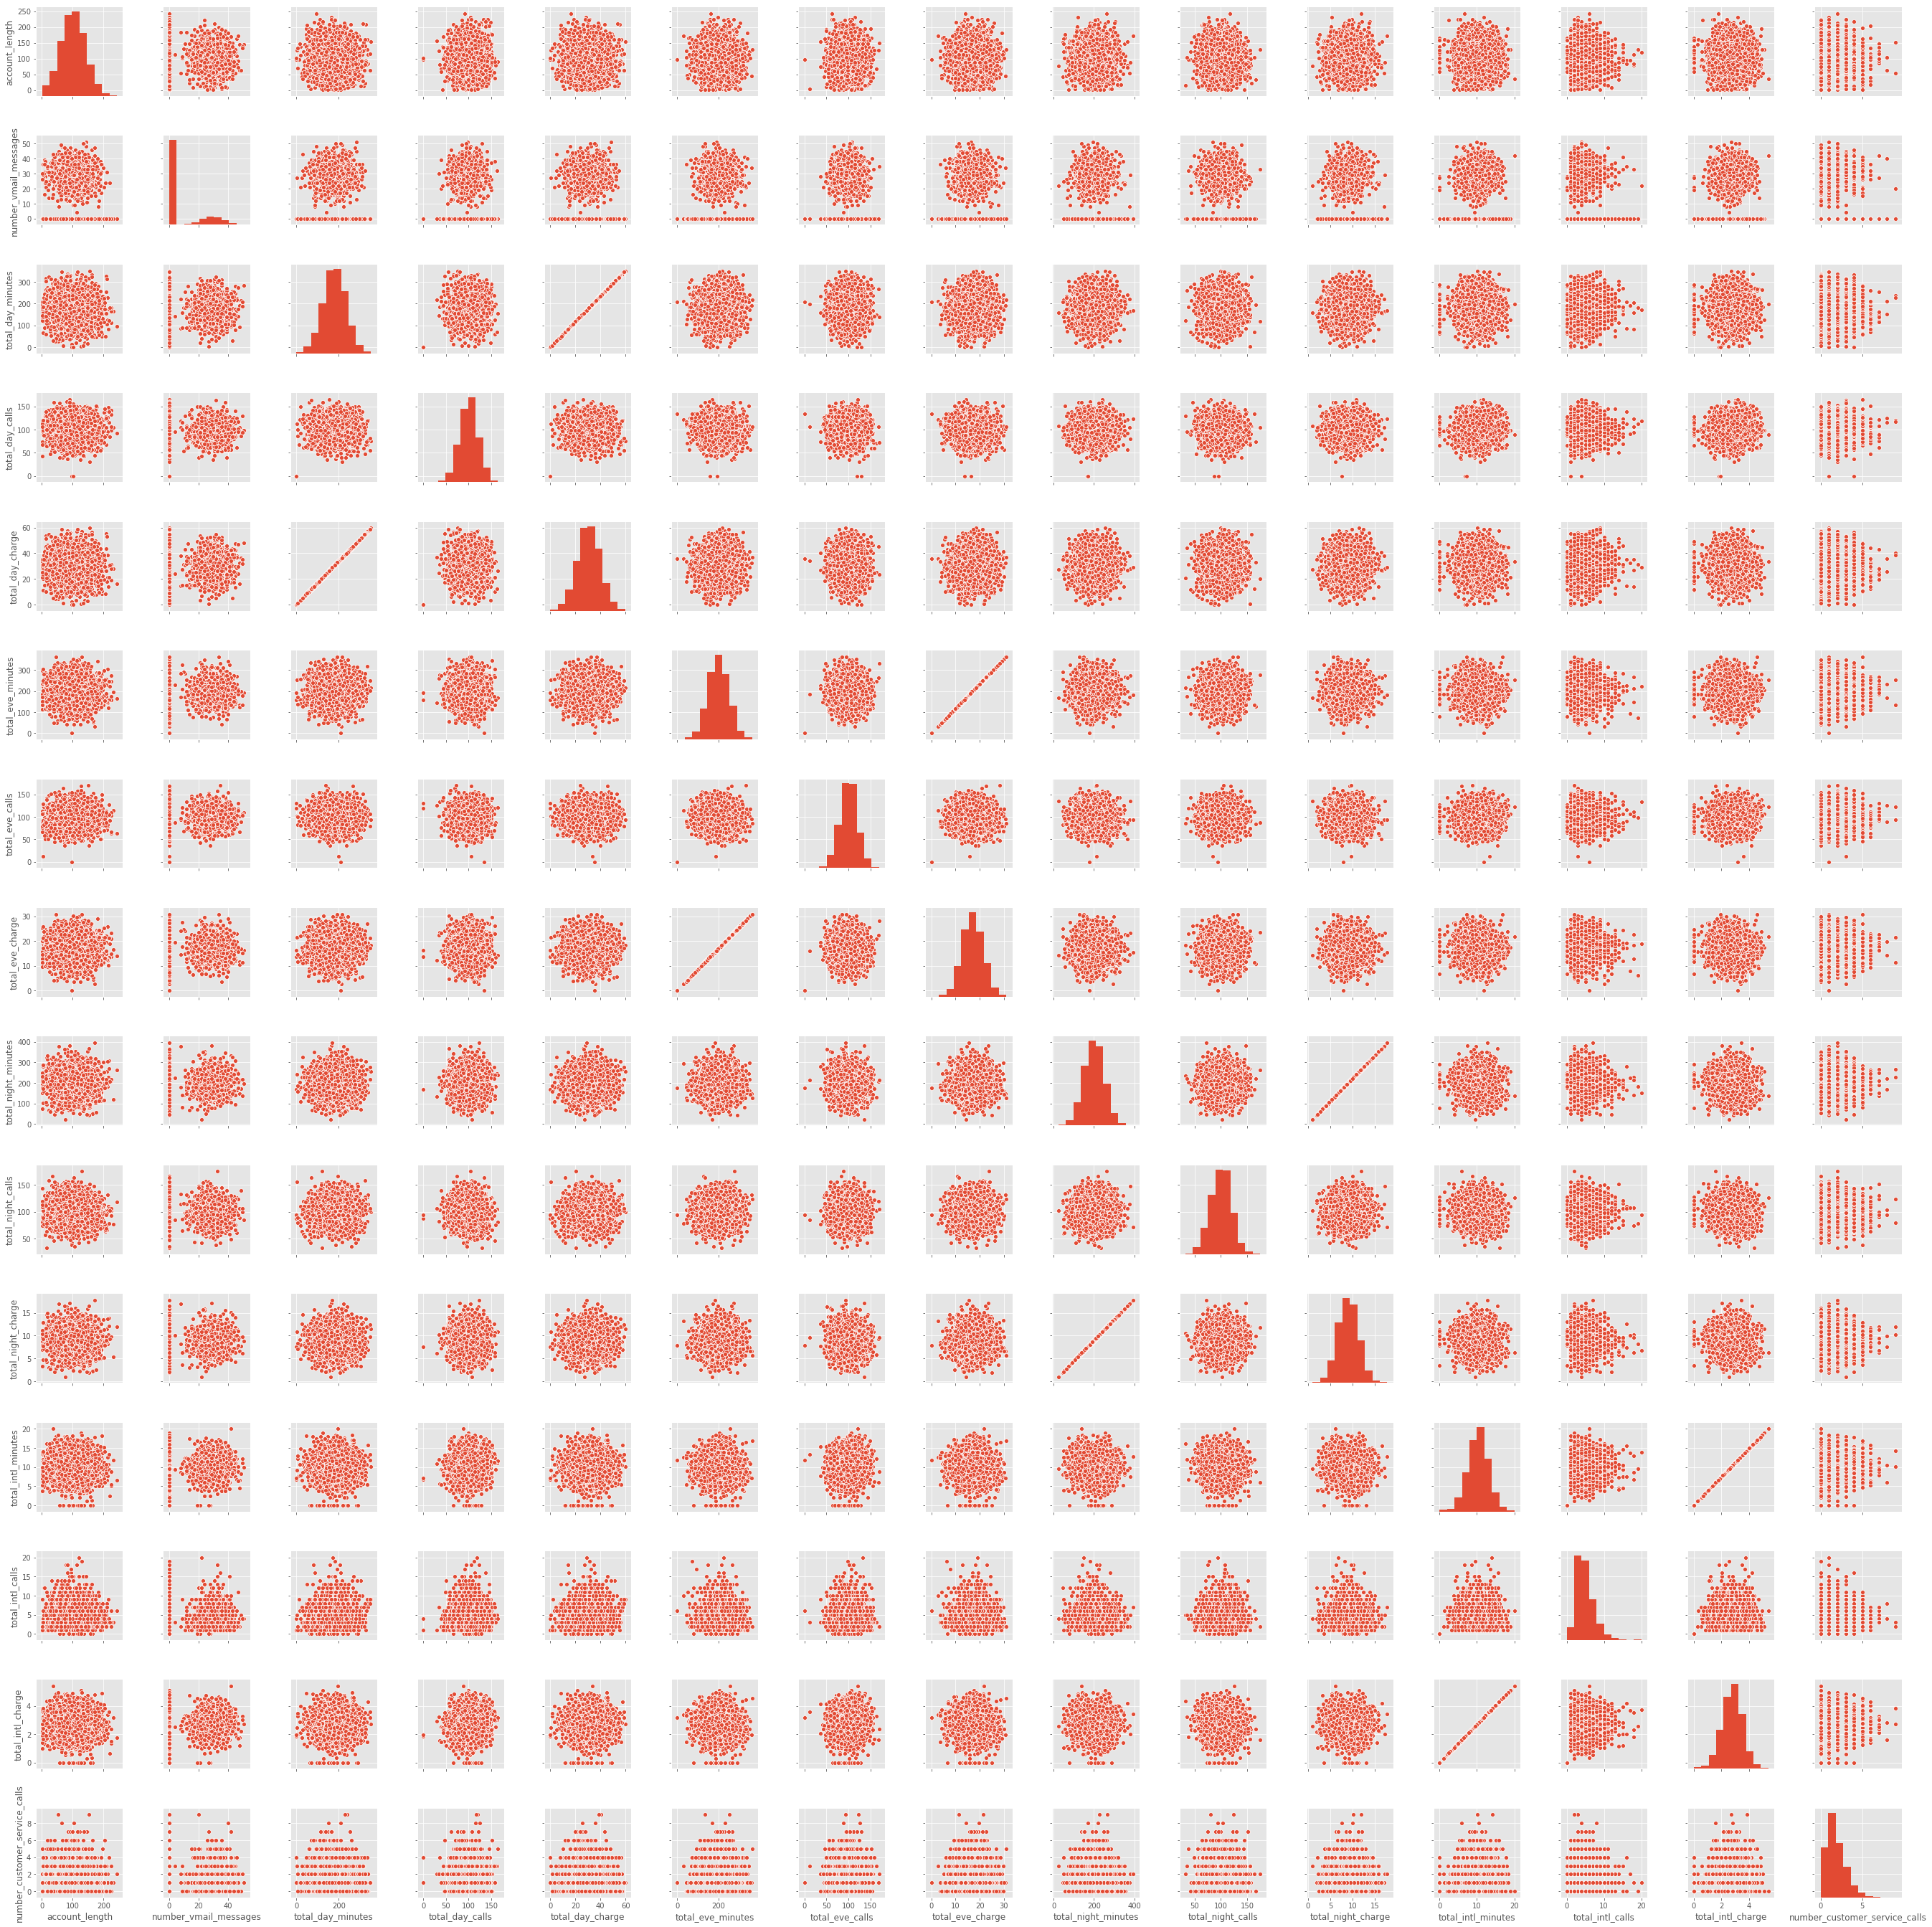

In [5]:
sns.pairplot(df)

Se aprecia un par de variables que deben ser estandarizadas y 3 que deben ser recodificadas.  
se procedera a realizar en la fase de preprocesamiento

In [6]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [7]:
df['state'] = LabelEncoder().fit_transform(df['state'])
df['area_code'] = LabelEncoder().fit_transform(df['area_code'])
df['international_plan'] = LabelEncoder().fit_transform(df['international_plan'])
df['voice_mail_plan'] = LabelEncoder().fit_transform(df['voice_mail_plan'])
df['churn'] = LabelEncoder().fit_transform(df['churn'])

In [8]:
df_test['state'] = LabelEncoder().fit_transform(df_test['state'])
df_test['area_code'] = LabelEncoder().fit_transform(df_test['area_code'])
df_test['international_plan'] = LabelEncoder().fit_transform(df_test['international_plan'])
df_test['voice_mail_plan'] = LabelEncoder().fit_transform(df_test['voice_mail_plan'])
df_test['churn'] = LabelEncoder().fit_transform(df_test['churn'])

In [40]:
df_test.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,y_hat
0,11,101,2,0,0,0,70.9,123,12.05,211.9,...,18.01,236.0,73,10.62,10.6,3,2.86,3,0,0.030942
1,26,137,2,0,0,0,223.6,86,38.01,244.8,...,20.81,94.2,81,4.24,9.5,7,2.57,0,0,0.050765
2,35,103,0,0,1,29,294.7,95,50.10,237.3,...,20.17,300.3,127,13.51,13.7,6,3.70,1,0,0.170762
3,32,99,1,0,0,0,216.8,123,36.86,126.4,...,10.74,220.6,82,9.93,15.7,2,4.24,1,0,0.043350
4,40,108,1,0,0,0,197.4,78,33.56,124.0,...,10.54,204.5,107,9.20,7.7,4,2.08,2,0,0.019009


In [9]:
x_to_train = df.drop(columns='churn', axis=1)
X_train = StandardScaler().fit_transform(x_to_train)
y_train = (df['churn'])

C:\Users\s4056291\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\s4056291\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [10]:
x_to_test = df_test.drop(columns='churn', axis=1)
X_test = StandardScaler().fit_transform(x_to_test)
y_test = (df_test['churn'])

C:\Users\s4056291\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\s4056291\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## Ejercicio 2: Comparación de AdaBoost y Gradient Boosting

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report , accuracy_score

In [12]:
param_grid_ada = {'n_estimators': [50,100,500,1000,2000],
             'learning_rate': [0.01 , 0.1 , 0.5 ]}

In [13]:
ada_grid = GridSearchCV(AdaBoostClassifier(), param_grid=param_grid_ada, cv=2, n_jobs=-1).fit(X_train,y_train)

In [14]:
y_hat_ada = ada_grid.best_estimator_.predict(X_test)

In [15]:
print(classification_report(y_test,y_hat_ada))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1443
           1       0.60      0.35      0.44       224

   micro avg       0.88      0.88      0.88      1667
   macro avg       0.75      0.66      0.69      1667
weighted avg       0.86      0.88      0.87      1667



In [16]:
param_grid_grad = {'learning_rate': [0.01, 0.1, 0.5],
                   'n_estimators': [50, 100, 500, 1000, 2000],
                   'subsample': [0.1,0.5,0.9]}

In [17]:
grad_grid = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid_grad, cv=2, n_jobs=-1).fit(X_train,y_train)

In [18]:
y_hat_grad = grad_grid.best_estimator_.predict(X_test)

In [19]:
print(classification_report(y_test,y_hat_grad))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1443
           1       0.92      0.71      0.80       224

   micro avg       0.95      0.95      0.95      1667
   macro avg       0.94      0.85      0.89      1667
weighted avg       0.95      0.95      0.95      1667



## Ejercicio 3: Principales factores asociados

In [20]:
def plot_importance(fit_model, feat_names):
    """TODO: Docstring for plot_importance.

    :fit_model: TODO
    :feat_names: TODO
    :returns: TODO

    """
    tmp_importance = fit_model.feature_importances_
    sort_importances = np.argsort(tmp_importance)[::-1]
    names = [feat_names[i] for i in sort_importances]
    plt.title('Feature importance')
    plt.barh(range(len(feat_names)), tmp_importance[sort_importances])
    plt.yticks(range(len(feat_names)), names, rotation=0)

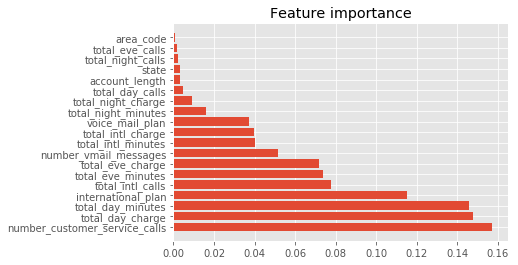

In [21]:
plot_importance(grad_grid.best_estimator_, df.drop(columns='churn').columns)

## Ejercicio 4: Probabilidad de fuga

In [28]:
df_test['y_hat'] = grad_grid.best_estimator_.predict_proba(X_test)[:,1]

In [31]:
df_test.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,y_hat
0,11,101,2,0,0,0,70.9,123,12.05,211.9,...,18.01,236.0,73,10.62,10.6,3,2.86,3,0,0.030942
1,26,137,2,0,0,0,223.6,86,38.01,244.8,...,20.81,94.2,81,4.24,9.5,7,2.57,0,0,0.050765
2,35,103,0,0,1,29,294.7,95,50.10,237.3,...,20.17,300.3,127,13.51,13.7,6,3.70,1,0,0.170762
3,32,99,1,0,0,0,216.8,123,36.86,126.4,...,10.74,220.6,82,9.93,15.7,2,4.24,1,0,0.043350
4,40,108,1,0,0,0,197.4,78,33.56,124.0,...,10.54,204.5,107,9.20,7.7,4,2.08,2,0,0.019009
